<a href="https://colab.research.google.com/github/max4-dev/ML-2/blob/baselineEgor/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import + read df

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats


df = pd.read_csv('data.csv')
df


<ipython-input-24-890232c2eae8>:10: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


<Axes: >

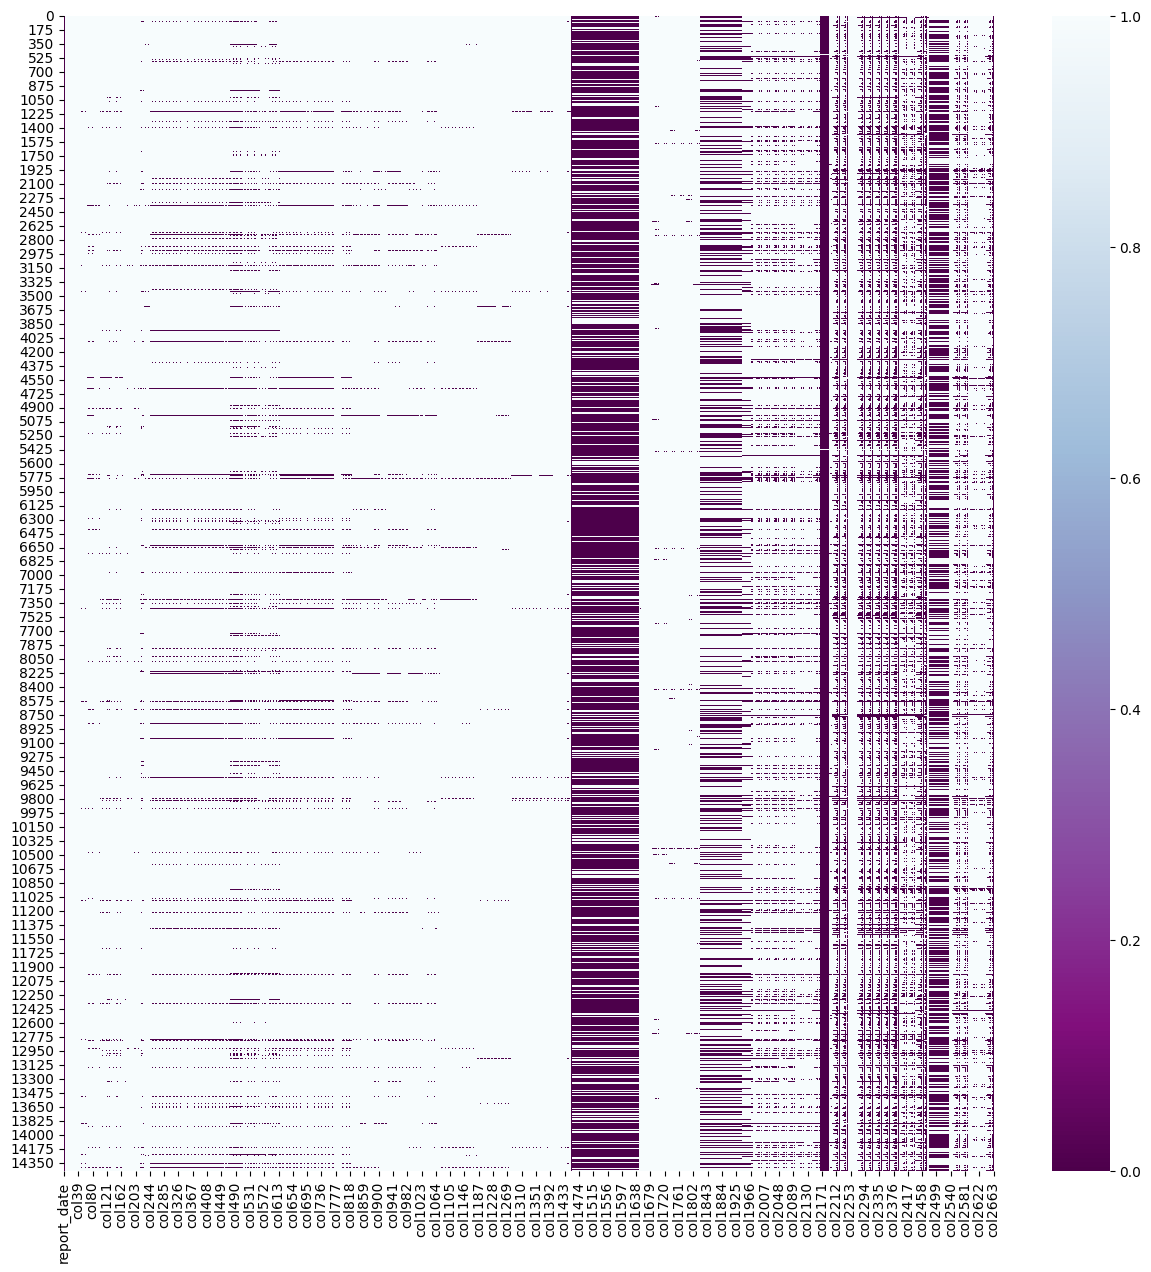

In [ ]:
#Проверка пропусков

plt.figure(figsize=(15, 15))  # Устанавливаем размер графика
sns.heatmap(df.isnull(), cmap='BuPu_r')

In [ ]:
#Проверка процентов

missing_values = df.isnull().sum()
missing_values

missing_percent = df.isnull().mean() * 100
missing_percent

,0
report_date,0.000000
client_id,0.000000
target,0.000000
col1,99.979247
col2,99.958495
...,...
col2659,96.499723
col2660,44.410625
col2661,44.410625
col2662,44.410625


In [ ]:
#Удаление дубликатов

df = df.drop_duplicates()
df

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
#Удаление колонок где пропусков > 80

threshold = 0.8  # 80% пропусков
df = df.loc[:, df.isnull().mean() < threshold]
df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
#Проверка типов

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 539 entries, report_date to col2663
dtypes: float64(534), int64(3), object(2)
memory usage: 59.4+ MB


In [ ]:
# Удаление строк с большим количеством пропусков
threshold = 0.5  # 50% пропусков
df = df.dropna(thresh=df.shape[1] * threshold, axis=0)
df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,fb0cd91e-0045-4cc1-8e11-8b867046a94e,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,fc11bfba-ee6e-4b7e-9cba-b0f4ebe7abbe,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
#Алгоритм для удаления дубликатов

unique_data_columns = []
duplicated_data_columns = set()

for col in df.columns:
    if not any(df[col].equals(df[other_col]) for other_col in unique_data_columns):
        unique_data_columns.append(col)
    else:
        duplicated_data_columns.add(col)

# Удаляем дублированные колонки
df = df[unique_data_columns]

# Вывод результата

df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,fb0cd91e-0045-4cc1-8e11-8b867046a94e,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,fc11bfba-ee6e-4b7e-9cba-b0f4ebe7abbe,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
# удаление колонки с непонятным значением
column_to_drop = 'col1454'
df = df.drop(columns=column_to_drop)
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9595 entries, 1 to 14455
Columns: 309 entries, report_date to col2663
dtypes: float64(305), int64(3), object(1)
memory usage: 22.7+ MB


In [ ]:
#смотрим что за колонка с объектом

object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['report_date'], dtype='object')

In [ ]:
# column_to_check = 'client_id'

# # Удаление строк с дублированными значениями в указанной колонке
# df = df.drop_duplicates(subset=[column_to_check], keep=False)
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
df['col1460'].unique()

array([ 1.,  4.,  2.,  3., nan,  0.,  7., 13.,  5.,  6., 10., 19., 12.,
        8.,  9., 17., 20., 11.])

In [ ]:
#Проверка на процент пропусков
missing_percent = df.isnull().mean() * 100
missing_percent > 80

,0
report_date,False
client_id,False
target,False
col1453,False
col1455,False
...,...
col2656,False
col2660,False
col2661,False
col2662,False


In [ ]:
#Удаление одинаковых столбцов
df = df.loc[:, df.nunique() > 1]
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [ ]:
#Запеняем пустные и неномерные на Nan

df = df.apply(pd.to_numeric, errors='coerce')

Выбросы в датасете:
Колонка 'target': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Колонка 'col1453': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

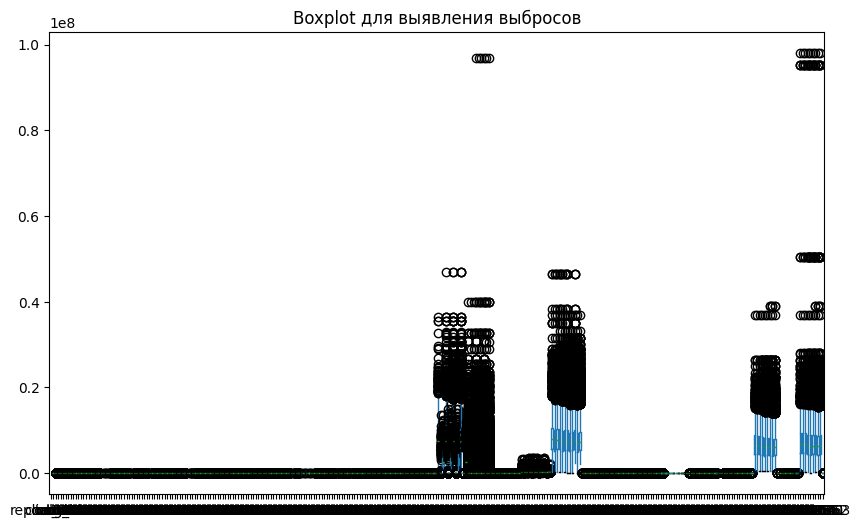

In [ ]:
#Проверка выбросов и вывод графика

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)  # Первый квартиль (25%)
    Q3 = column.quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница
    # Выявление выбросов
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Применение функции к каждой колонке
outliers_dict = {}
for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

# Вывод выбросов
print("Выбросы в датасете:")
for col, outliers in outliers_dict.items():
    print(f"Колонка '{col}': {outliers.tolist()}")

# Визуализация выбросов с использованием boxplot
plt.figure(figsize=(10, 6))
df.boxplot(grid=False)
plt.title('Boxplot для выявления выбросов')
plt.show()

In [ ]:
# замена медианой если ненорм распределение, если норм, то средним

import scipy.stats as st

# Identify numerical columns and filter out columns with all NaNs
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if df[col].count() > 0]

# Handle string values in numerical columns
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns with all NaNs
df = df.dropna(axis=1, how='all')

# Iterate over each numerical column
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        data = df[col].dropna()
        if len(data) >= 3:
            stat, p = st.shapiro(data)
            alpha = 0.05
            if p > alpha:
                # Data is approximately normally distributed
                fill_value = data.mean()
                df[col].fillna(fill_value, inplace=True)

            else:
                # Data is not normally distributed
                q1 = data.quantile(0.25)
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                lower_fence = q1 - 1.5 * iqr
                upper_fence = q3 + 1.5 * iqr
                outliers = data[(data < lower_fence) | (data > upper_fence)]
                skew = data.skew()
                if not outliers.empty and abs(skew) > 0.5:
                    # Data has outliers and is asymmetric
                    fill_value = data.median()
                    df[col].fillna(fill_value, inplace=True)

                else:
                    # Data is not normal but may be symmetric without significant outliers
                    fill_value = data.mean()
                    df[col].fillna(fill_value, inplace=True)

        else:
            # Not enough data to perform Shapiro-Wilk test
            # Fill missing values with median
            fill_value = data.median()
            df[col].fillna(fill_value, inplace=True)


df

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.258682
4,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.254164
5,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,6800000.0,6694442.0,6780769.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.260005


In [ ]:
df.describe()

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
count,9595.000000,9595.000000,9595.000000,9595.000000,9595.000000,9595.000000,9595.000000,9595.000000,9595.000000,9595.00000,...,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9.595000e+03,9595.000000
mean,3020.133403,0.026055,0.077124,0.013966,0.129026,0.265451,0.398228,0.807504,1.456175,0.11235,...,6.978341e+06,6.879163e+06,6.952932e+06,6.786383e+06,6.674003e+06,6.743868e+06,6.860386e+06,6.723850e+06,6.793612e+06,0.258984
std,1999.643033,0.159308,0.266801,0.130795,0.468996,0.655225,0.762046,0.968089,1.109791,0.44862,...,2.734736e+06,2.728679e+06,2.725768e+06,3.506522e+06,3.485158e+06,3.482028e+06,3.850192e+06,3.817617e+06,3.814705e+06,0.007761
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,6.800000e+06,6.694442e+06,6.780769e+06,6.097486e+06,6.000000e+06,6.070000e+06,5.139765e+06,5.047000e+06,5.120000e+06,0.256261
50%,2766.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,...,6.800000e+06,6.694442e+06,6.780769e+06,6.421782e+06,6.317500e+06,6.400000e+06,6.375000e+06,6.244578e+06,6.320000e+06,0.256919
75%,4477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.00000,...,6.800000e+06,6.694442e+06,6.780769e+06,6.690000e+06,6.578000e+06,6.643650e+06,7.800000e+06,7.638422e+06,7.735448e+06,0.257675
max,8302.000000,1.000000,1.000000,3.000000,11.000000,11.000000,11.000000,20.000000,20.000000,11.00000,...,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [ ]:
#Проверка пропусков

null_columns = df.columns[df.isnull().any()].tolist()
if null_columns:
    print(f"Столбцы с пропусками: {null_columns}")
else:
    print("Пропусков нет ни в одном столбце.")

Пропусков нет ни в одном столбце.
